# Solutions Jupyter Notebook exercises
The following solution is just one of many, remember that just because your solution looks different doesn't mean it's wrong. Compare both solutions (yours and the sample solution) before making a judgement.
## 02-2_python
### Exercise 
1. write a loop that prints every character of the string "Hello RWTH". Rember that Strings are tuples.
2. Write a **for**, that prints every second word of the sentence "The house has to please everyone, contrary to the work of art which does not. The work is a private matter for the artist. The house is not." 
    - hint: strings can be split with the  [**split(' ')**](https://docs.python.org/3.8/library/stdtypes.html#str.split) funciton in single words. The length of lists can be determined with **.len()** .  Then you could either 
    -access each  nth element mit dem **[]**
    -or use  
    ```python
    for element in liste:
           print (element)`
    ```` 
### Solution
The following steps are important:
* Load all necessary Python packages
* Load the file
* Extract the required information
* Think of a way to plot the data (mathplotlib is only one possibility)

In [ ]:
# Exercise 1
my_str = "Hello RWTH"
for elem in my_str:
    print (elem)

In [ ]:
#Exercise 2
my_new_str = "The house has to please everyone, contrary to the work of art which does not. The work is a private matter for the artist. The house is not."
new_list = my_new_str.split(' ')
for elem in new_list[::2]:
    print(elem)

## 03-1_formats: JSON
### 3.0.1 Exercise 
Now it is your turn. We provided a JSON file called "markante_bauw.json". Load the file and extract the building height and number of floors. After extracting the data, use the **mathplotlip** library and visualize your data in dependence, as a graph. 
### Solution
The following steps are important:
* Load all necessary Python packages
* Load the file
* Extract the required information
* Think of a way to plot the data (mathplotlib is only one possibility)

In [24]:
#Import all necessary packages/ libraries
import pandas as pd
import matplotlib.pyplot as plt
#Read/ parse JSON file
mark_bau = pd.read_json(r'./data/markante_bauw.json')
#Print first 5 lines of table
mark_bau.head(5)

,help,success,result
fields,Search a datastore table. :param resource_id: ...,True,"[{'id': 'latitude', 'type': 'text'}, {'id': 'l..."
limit,Search a datastore table. :param resource_id: ...,True,10
records,Search a datastore table. :param resource_id: ...,True,"[{'latitude': '51.217746', 'longitude': '6.779..."
resource_id,Search a datastore table. :param resource_id: ...,True,[a89b6c69-9046-4630-938a-c381048ed718]
total,Search a datastore table. :param resource_id: ...,True,37


In [33]:
mark_bau.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, fields to total
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   help     5 non-null      object
 1   success  5 non-null      bool  
 2   result   5 non-null      object
dtypes: bool(1), object(2)
memory usage: 297.0+ bytes


In [34]:
#Define function for slicing table
def get_info(info):
    extr_info = []
    slic_df = mark_bau['result']['records']
    for records in slic_df:
        new_inf = records[info]
        extr_info.append(new_inf)
    return extr_info
print(get_info)

<function get_info at 0x7f35c6976160>


In [27]:
#Get information 'gebaeudehoehe'
gebh = get_info('gebaeudehoehe')
print(gebh)

['Höhe 69 m', 'Höhe 124,9 m', 'Höhe 61 m', 'Höhe 59 m', 'Höhe 60 m', 'Höhe 62 m', 'Höhe 58 m', 'Höhe 60 m', 'Höhe 74 m', 'Höhe 63 m']


In [28]:
#Get information 'stockwerke' and extract integer from string
stock = get_info('stockwerke')
new_li = []
print(stock)
for elems in stock:
    for elem in elems.split(): 
        if elem.isdigit():
            new_li.append(elem)
            print(elem)

['18 Stockwerke', '31 Stockwerke', '19 Stockwerke', '17 Stockwerke', '18 Stockwerke', '18 Stockwerke', '12 Stockwerke', '17 Stockwerke', '26 Stockwerke', '16 Stockwerke']
18
31
19
17
18
18
12
17
26
16


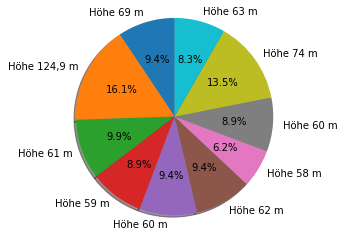

In [29]:
#Create example plot
fig1, ax1 = plt.subplots()
ax1.pie(new_li, labels=gebh, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 03-1_formats: CSV
### 3.1.1 Exercise 1
The code above reads a CSV file and filters how often a place is called. This information is visualized in a diagram. The diagram can hardly be read, check out matplotlip and try to visualize the output in different ways. 
### Solution
We do not need the hole code provided in the section CSV. What we need is:
* The necessary Python packages
* The required CSV file
* The slicing of the file for specific information
* An advantageous way of presentation

In [30]:
#Import all necessary packages/ libraries
import pandas as pd
import os
import matplotlib.pyplot as plt 
#Read/ parse CSV file
bauwerk_ac = pd.read_csv(r"./data/bauwerksliste_aachen.csv", sep=';', engine='python')
print (bauwerk_ac)

                      Bauwerks-Nr.:        Bauwerksname:         Ort  \
0                              A001              Akerweg    Vetschau   
1                              A002    Bocholtzer Straße    Vetschau   
2                              A003  Burtscheider Straße  Burtscheid   
3                              A003  Burtscheider Straße  Burtscheid   
4                              A003  Burtscheider Straße  Burtscheid   
..                              ...                  ...         ...   
630                            S223       Benno-Levy-Weg      Haaren   
631                            S224      Friedenstraße I      Haaren   
632                            S225            Hexenberg      Aachen   
633                             NaN                  NaN         NaN   
634  Gesamtanzahl der Bauwerke: 635                  NaN         NaN   

    Teilbauwerks-Nr.: Teilbauwerksname:                            Bauwersart  \
0                 NaN            Brücke    Bogenartige

In [31]:
#Counting how often each name shows up
place = bauwerk_ac.loc[:, 'Ort']
myset = set(place)
x = {}
for elem in myset:
    for i in place:
        if elem == i:
            x[elem] = x.get(elem, 0)+1

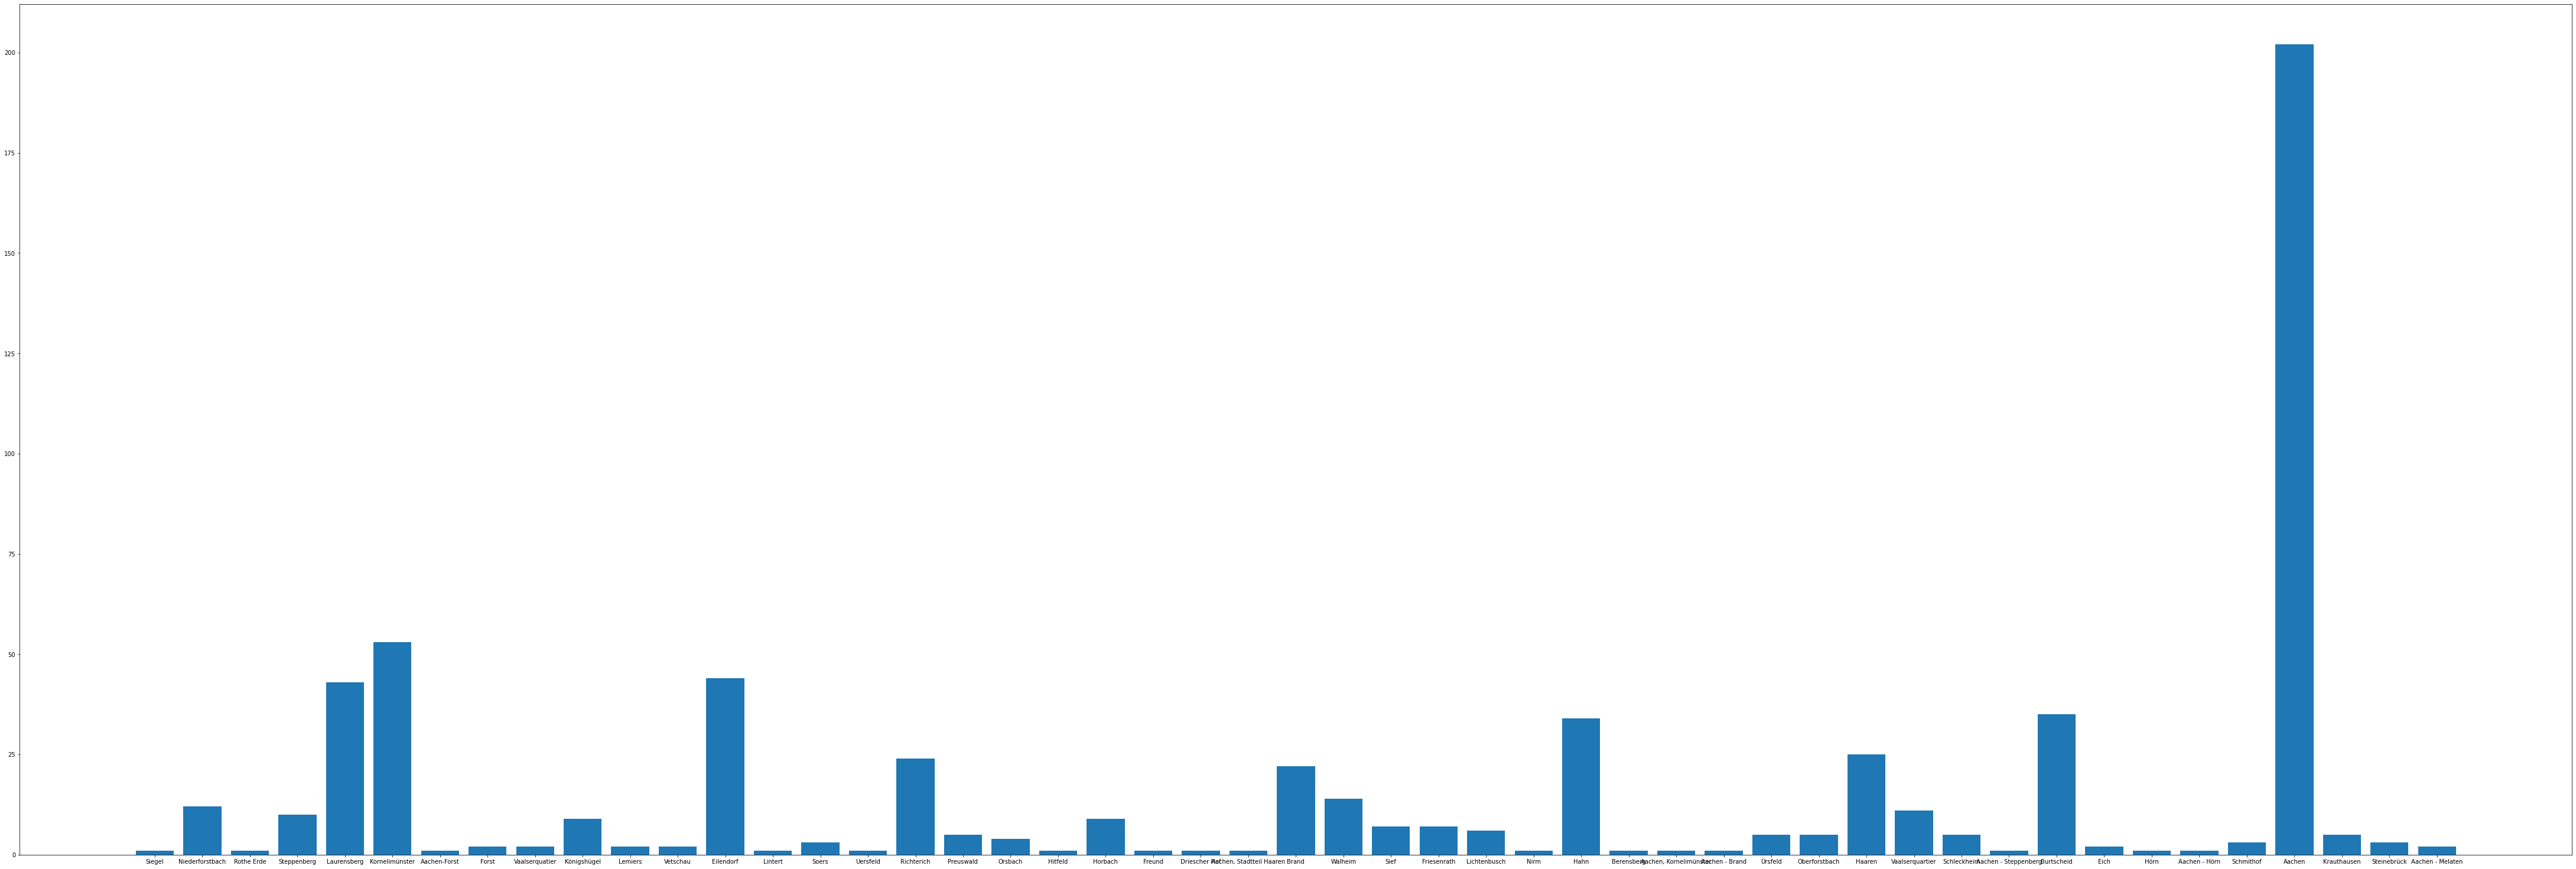

In [32]:
#There are a lot of information, so we change the visualisation by using a bar diagram
fig = plt.figure()
ax = fig.add_axes([0,0,10,5])
ax.bar(x.keys(), x.values())
plt.show()

### 3.1.1 Exercise 2
Take the CSV file **bauwerksliste_aachen.csv** slice the file and extract information about building year just for buildings with "Ort" = Aachen.
### Solution

In [ ]:
#Read/ parse CSV file
bauwerk_ac = pd.read_csv(r"./data/bauwerksliste_aachen.csv", sep=';', engine='python')
#Get the needed columns
col = ['Ort', 'Baujahr:']
new = bauwerk_ac[col]
#Check where information 'Ort:' equals 'Aachen'
just_aa_bjahr = new[new["Ort"] == "Aachen"]
print (just_aa_bjahr)

## 03-1_formats: XML
### 3.2.1 Exercise 1
Try to get a list of the buildings mentioned in this XML file by using ElementTree. It is possible, that you will have to open the XML and read through it. 
### Solution

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
tree = ET.parse("./data/markante_bauw_wuppert.xml")
html = tree.getroot()
ns = {"gmd": "http://www.isotc211.org/2005/gmd", "gco": "http://www.isotc211.org/2005/gco", "csw" : "http://www.opengis.net/cat/csw/2.0.2"}
for child in html.findall(".//gmd:descriptiveKeywords//gmd:keyword/gco:CharacterString", namespaces = ns):
    print(child.text)

### 3.2.1 Exercise 2
Try and write a XML file yourself. We already had a file with museums in Düsseldorf, let's create one for Aachen. Search the museums and add for each of them a little summary of their focus.
### Solution

## 04_point_pattern_analysis
### 1.6.1 Exercise 
Look at the point analysis again carefully and note which steps are taken here and why. Describe what happens whereby adding notes '#' in the code. If you are working with code, it is important that you understand the steps. Change the code and see what happens. Load the file 'nodes-forest_ac.geojson' and use the same algorithm but use different layout information.
### Solution
The following cells are all taken out of the 04_point_pattern_analysis file. We add comments for a better understanding.

In [ ]:
#Import all necessary packages/ libraries
import numpy
import pandas as pd
import geopandas
import pysal
import seaborn
import contextily
import os
import matplotlib.pyplot as plt 
#Read/ parse CSV file
avv_halt = pd.read_csv(r"./data/AVV_Haltestellen.csv", sep=',', engine='python')
avv_halt.head()

In [ ]:
#when opening the csv file using a text editor one can see, that the given numbers in two columns have to be divided by 1000000. 
#We take each element of the column called 'WGS84_RW_X_1000000' and divide each element by 1000000 and save the new value in the list new.
ort = avv_halt['WGS84_RW_X_1000000'] 
old = []
new = []
for elem in ort:
    old.append(elem)
    elem = elem / 1000000
    new.append(elem)

In [ ]:
#In the last cell we divided all the elements in the column 'WGS84_RW_X_1000000' by 1000000. And REPLACE the old value with the new one in out table.
avv_halt['WGS84_RW_X_1000000'].replace(old, new, inplace = True)
avv_halt.head()

In [ ]:
#The same procedure again for the second column with values, that have to be divided by 1000000
ort2 = avv_halt['WGS84_HW_X_1000000'] 
old2 = []
new2 = []
for elem2 in ort2:
    old2.append(elem2)
    elem2 = elem2 / 1000000
    new2.append(elem2)

In [ ]:
avv_halt['WGS84_HW_X_1000000'].replace(old2, new2, inplace = True)
avv_halt.head()

In [ ]:
#To make it more comfortable, we RENAME both columns as latitude and longitude
avv_halt = avv_halt.rename(columns = {'WGS84_HW_X_1000000' : 'latitude'})
avv_halt = avv_halt.rename(columns = {'WGS84_RW_X_1000000' : 'longitude'})
avv_halt.head()

In [ ]:
#Now we have the coordinates. Here we use the method jointplot take longitude and latitude form the datafile 'avv_halt' and plot them in a diagram.
seaborn.jointplot(x='longitude', y='latitude', data=avv_halt, s=0.5);

In [ ]:
#Even though, the plot shows both columns longitude and latitude in dependency, a basemap would be good for orientation. 
joint_axes = seaborn.jointplot(
    x='longitude', y='latitude', data=avv_halt, s=0.5
)
#adding the basemap
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
);

In [ ]:
#Generating the subplot by using the subplot method to generate fig (figure) and ax (axes)
f, ax = plt.subplots(1, figsize=(12, 9))
#Till now we just have points but it is hard to tell their density so we use the hexbin method.
hb = ax.hexbin(
    avv_halt['longitude'],
    avv_halt['latitude'], 
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
#again we use the basemap
contextily.add_basemap(
    ax, 
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron
)
plt.colorbar(hb)
ax.set_axis_off()

In [ ]:
#An alternative to hexbin in kdeplot. Again, we first create a subplot using matplotlib
f, ax = plt.subplots(1, figsize=(9, 9))
#Next we use the kdeplot method to generate one
seaborn.kdeplot(
    x = avv_halt['longitude'],
    y = avv_halt['latitude'], 
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
#Next we add a basemap
contextily.add_basemap(
    ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Positron,
    
)
ax.set_axis_off()

### 1.6.1 Exercise 
Look at the point analysis again carefully and note which steps are taken here and why. Describe what happens whereby adding notes '#' in the code. If you are working with code, it is important that you understand the steps. Change the code and see what happens. Load the file 'nodes-forest_ac.geojson' and use the same algorithm but use different layout information.
### Solution
The following cells are all taken out of the 04_point_pattern_analysis file. We add comments for a better understanding.

In [ ]:
#import packages
import geopandas as gpd
from pandas.io.json import json_normalize
import contextily
import matplotlib.pyplot as plt 
import seaborn
import numpy as np
#loading the file prepared in data
grillpl = gpd.read_file(r'./data/knotenpunkte-wald_ac.geojson')
grillpl= grillpl.to_crs(epsg=3857)
grillpl = grillpl['geometry']
grillpl.head(10)

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 10))
hb = ax.hexbin(
    grillpl.x,
    grillpl.y,
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
contextily.add_basemap(
    ax, 
    crs=grillpl.crs.to_string(),
    source=contextily.providers.Stamen.Toner
)
plt.colorbar(hb)
ax.set_axis_off()

## 06_spatial_feature_analysis
### 1.3.1 Exercise 
Take a look at the second example. Centroid the polygon and figure out how many parking areas are within 50, 100, 150, 200 meter.
### Solution
The first 4 of the following cells are taken out of the second part of 06_spatial_feature_analysis file. 

In [ ]:
#Import all necessary packages/ libraries
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt 
import contextily
import osmnx as ox
from IPython.display import Image

%matplotlib inline
ox.config(log_console=True)
ox.__version__

In [ ]:
#Read/ parse SHP file
uz = gpd.read_file("./data/umweltzone.shp")
uz.head()
uz.info()

In [ ]:
uz = uz.to_crs("EPSG:4326")
uz.head()

In [ ]:
#Create a polygon
uz_ch = uz.unary_union.convex_hull
uz_ch

In [ ]:
#It starts here, by centering the polygon
new = uz_ch.centroid
#Switching points
change_coor = (new.y, new.x)

In [ ]:
#Quering OSM by using a center point, the required tags and a distance
tags={"amenity": 'parking'}
gdf = ox.geometries_from_point(change_coor, tags, dist=750)
gdf.plot()

In [ ]:
#For visualistaion, add a basemap
gdf= gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(10,10), alpha=0.5, edgecolor='k')
contextily.add_basemap(
    ax,
    crs=gdf.crs.to_string(), 
    source=contextily.providers.Stamen.Toner
)

## 07_osm_geometry_and_graph
### 1.2.1 Exercise 
Create a figure ground plan for your hometown or a city by choice, choose a suitable size.
### Solution

In [ ]:
#Import all necessary packages/ libraries
import osmnx as ox
from IPython.display import Image

%matplotlib inline
ox.config(log_console=True)
ox.__version__

In [ ]:
tags={"building":True}
#Change the point to the center ponit of your city (google helps here)
point = (50.935173, 6.953101)
size=500
#Choose an appropriate distance here. You may need to change this one, but be carefull not to query a massiv amount of data!
dist = 2000
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)

In [ ]:
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
#You also should change the name here, but that is just cosmetic.
fp = f"./koeln_schwarzplan.png"
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    bgcolor="white",
    color="black",
    filepath=fp,
    dpi=300,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

## 07_osm_geometry_and_graph
### 1.5.1 Exercise 
Add another path, for example from the Aachen university hospital to the Aachen city hall. You are welcome to choose another path, but the map must be extended and for practise do not reuse Reiff and Hbf. Print both the existing and the new path in one map use different colours. Hint: Checkout the OSMnx documentation for functions such as plot_graph_route().
### Solution

In [ ]:
point = (50.775593, 6.082478)
reiff = ox.geocode("reiff museum aachen")
hbf = ox.geocode("Aachen Hauptbahnhof")
#first you need to get the other coordinates
uk = ox.geocode("Uniklinik RWTH Aachen")
rathaus = ox.geocode("Aachener Rathaus")

In [ ]:
#Attention, getting the whole of Aachen takes many minutes, we will get the inner city only
#G = ox.graph_from_place("Aachen, Germany", network_type="walk")
G = ox.graph_from_point(point, dist=1000, network_type="bike")

In [ ]:
ax, fig = ox.plot_graph(G, node_color='b', node_zorder=3, bgcolor='#FFFFFF')

In [ ]:
start = ox.nearest_nodes(G, reiff[1], reiff[0])
dest  = ox.nearest_nodes(G, hbf[1], hbf[0])

In [ ]:
start1 = ox.nearest_nodes(G, uk[1], uk[0])
dest1  = ox.nearest_nodes(G, rathaus[1], rathaus[0])

In [ ]:
route1 = ox.shortest_path(G, start, dest)
route2 = ox.shortest_path(G, start1, dest1)
routes = [route1, route2]
#Sadly the colour change just works for the method plot_graph_route
col = ['r', 'y']
#ox.plot_graph_route(G, route1)

In [ ]:
fig, ax = ox.plot_graph_routes(G, routes, route_color=col)

## 08_osm_isochrone_map 
### 1.4.1 Exercise 
Center your own living address and find out what is reachable using only bike network. Figure out what the average speed using a bike is and assume trip times in a range from 20 to 50 and use another colour map.
### Solution
We do not take all code cells, because they are exactly the same as in the 08_isochrone_map.

In [ ]:
import sys
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon

%matplotlib inline
ox.config(log_console=True)
ox.__version__

In [ ]:
#Change place/ adress
#############################################
place = "Schinkelstraße 1, Aachen, Germany"
#############################################
#change type
#############################################
network_type = "bike"
#############################################
#Maybe change distance but be careful, you will download a lot of information
#############################################
dist = 10000
#############################################
#Change trip times
#############################################
trip_times = [20, 30, 40, 50]
#############################################
#Change travel speed
#############################################
travel_speed = 22.1 #walking speed in km/hour
#############################################
#EVERYTHING ELSE REMEINS THE SAME, (one Exception)...!!!

In [ ]:
G = ox.graph_from_address(place, dist=dist, network_type=network_type)

In [ ]:
# find the centermost node and then project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes["geometry"].unary_union.centroid.xy
center_node = ox.nearest_nodes(G, x[0], y[0])
G = ox.project_graph(G)

In [ ]:
# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute

In [ ]:
# get the color
#... EXCEPT for cmap, we change cmap (matplotlib) to get another colour schema
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap="viridis", start=0, return_hex=True)

In [ ]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot_graph(
    G,
    node_color=nc,
    node_size=ns,
    node_alpha=0.8,
    edge_linewidth=0.3,
    edge_color="#ffffff",
)

In [ ]:
# make the isochrone polygons
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

In [ ]:
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#ffffff", edge_alpha=0.2, node_size=0
)
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec="none", alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()